In [1]:
import tifffile as tiff
from octvision3d.utils import get_filenames
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

In [3]:
# path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/imagesTr"
# label_path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/labelsTr"

path = "/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs"
label_path = "/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/labelsTs"

color_map = {
    1: "#80ae80",  # CNV
    2: "#f1d691",  # DRU
    3: "#b17a65",  # EX
    4: "#6fb8d2",  # FLU
    5: "#d8654f",  # GA
    6: "#dd8265",  # HEM
    7: "#90ee90",  # RPE
    8: "#a200ff",  # RET
    9: "#8f8f70",  # CHO
    10: "#e1f0fd", # VIT
    11: "#75fafd", # HYA
    12: "#b0fdd1", # SHS
    13: "#fdfd54", # ART
    14: "#387df8", # ERM
    15: "#643200", # SES
}

label_map = {
    1: "CNV",
    2: "DRU",
    3: "EX",
    4: "FLU",
    5: "GA",
    6: "HEM",
    7: "RPE",
    8: "RET",
    9: "CHO",
    10: "VIT",
    11: "HYA",
    12: "SHS",
    13: "ART",
    14: "ERM",
    15: "SES"
}

In [4]:
def plot_confusion_matrix(true_labels_flat, pred_labels_flat, label_map):
    all_labels = np.arange(1, 16)
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_labels_flat, pred_labels_flat, labels=all_labels)

    # Normalize the confusion matrix by row (i.e., by the sum of true labels in each row)
    # Use np.where to handle division by zero and avoid NaNs
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    conf_matrix_normalized = np.divide(conf_matrix, row_sums, where=row_sums!=0)

    # Define a custom function for formatting annotations
    def annotate_fmt(val):
        if val < 0.01:
            return "0"
        return f"{val:.2f}"
    
    # Create a 2D array of formatted strings
    annot = np.array([[annotate_fmt(cell) for cell in row] for row in conf_matrix_normalized])

    # Plot the confusion matrix using seaborn's heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(
        conf_matrix_normalized,
        annot=annot,
        fmt="",
        cmap="Blues",
        xticklabels=label_map.values(),
        yticklabels=label_map.values(),
    )
    
    # Add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    # Show the plot
    plt.show()

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_1-CNV-143-CNV-4-123028_0000.tif
(19, 496, 1024)
[ 1  2  3  5  7  8  9 10 13 14] [  23507     174      92  134133   85395 1288595 4815787 2614290  637772
   50431]
(19, 496, 1024)
(19, 496, 1024)


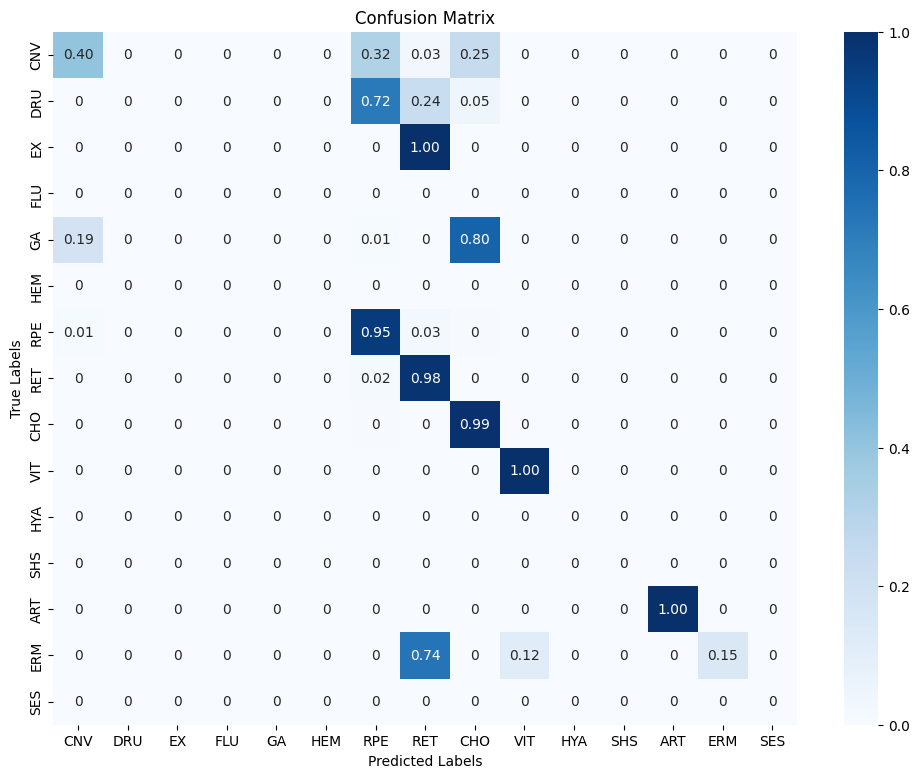

Prediction


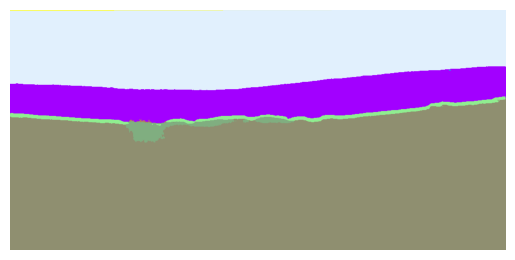

Label


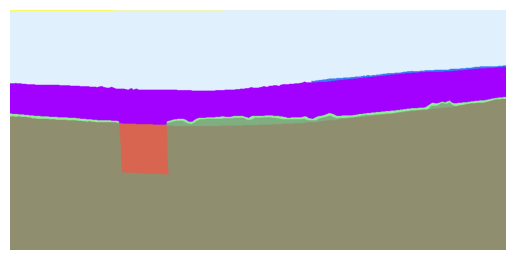

Original


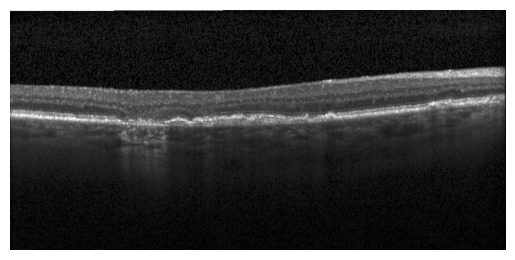

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_1-CNV-174-CNV-6-73128_0000.tif
(19, 496, 1024)
[ 1  2  5  6  7  8  9 10 13 14] [ 126240     480  266238   13935   84666 1062169 4723984 2897415  467278
    7771]
(19, 496, 1024)
(19, 496, 1024)


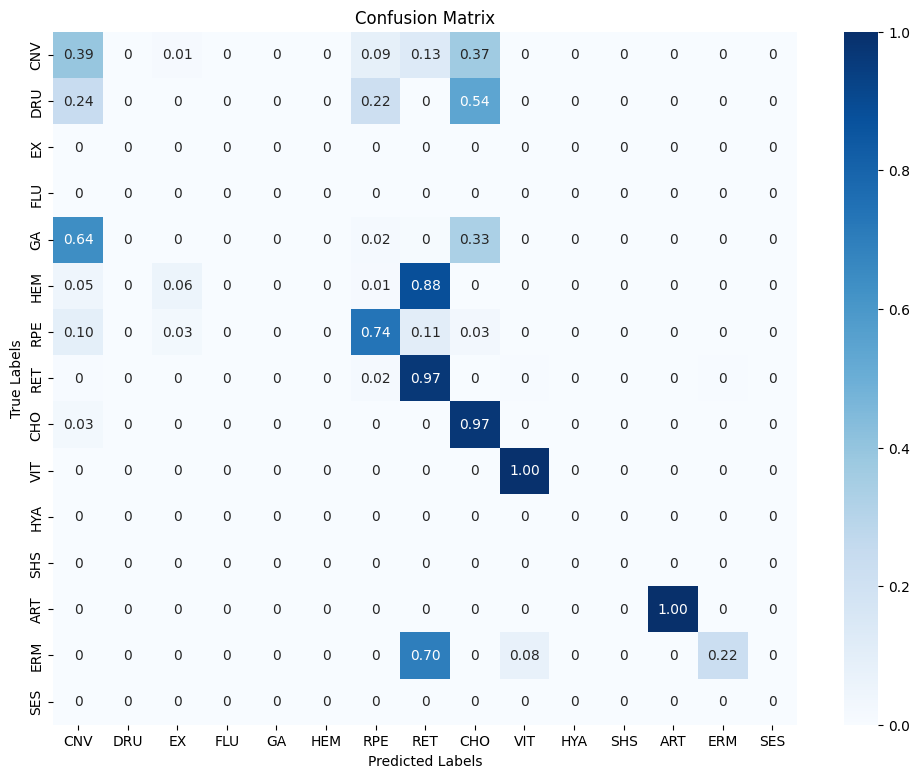

Prediction


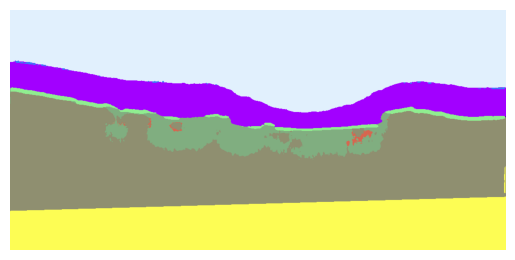

Label


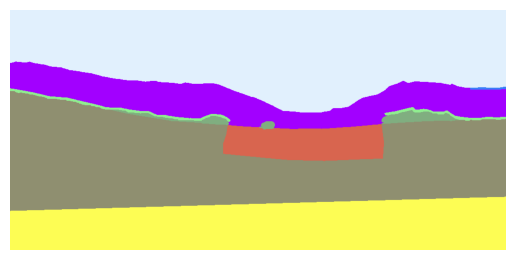

Original


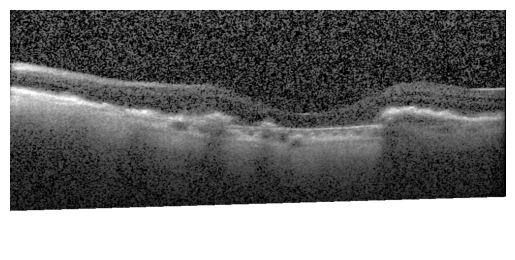

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_1-CNV-177-CNV-6-53885_0000.tif
(19, 496, 1024)
[ 1  2  5  6  7  8  9 10 13 14 15] [  40972   17261   41529    5163  111017 1349245 4298452 3013168  765130
    8118     121]
(19, 496, 1024)
(19, 496, 1024)


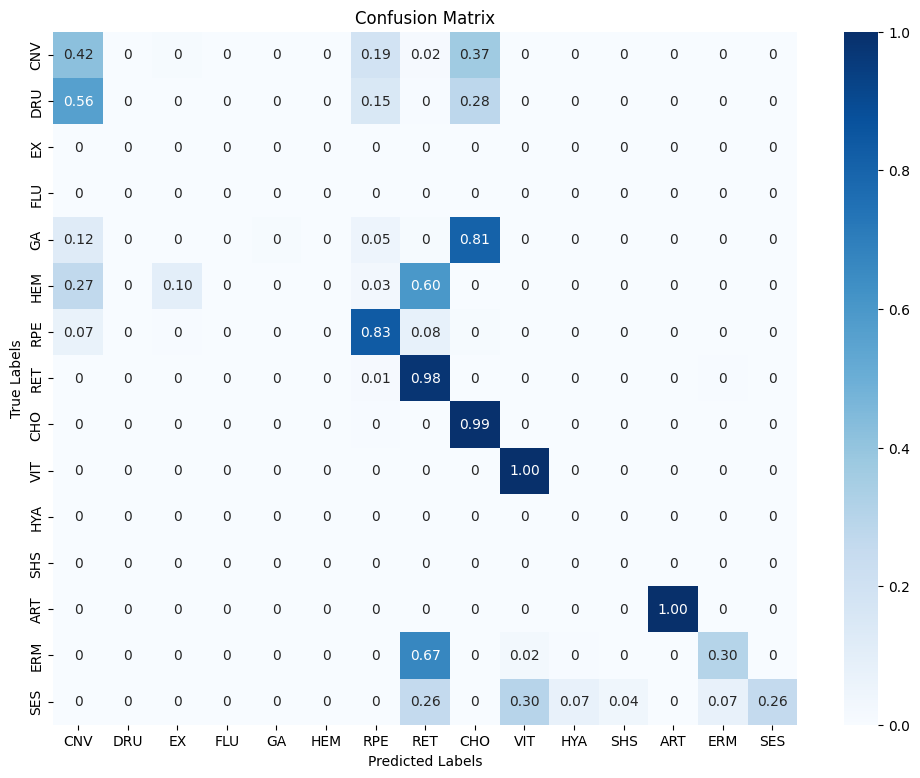

Prediction


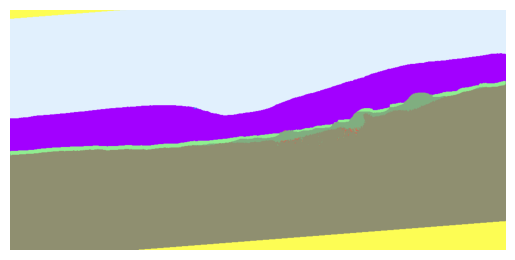

Label


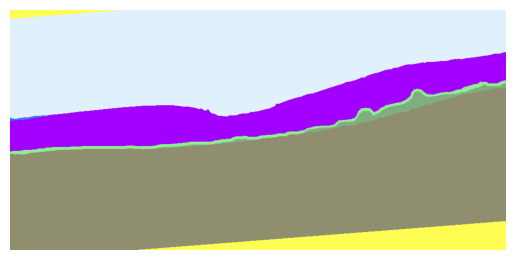

Original


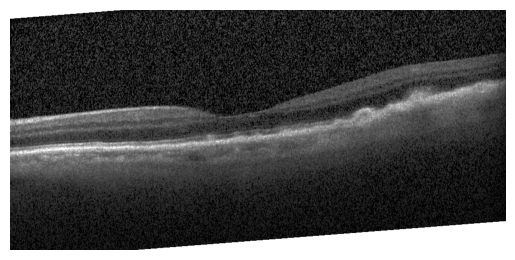

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_1-DRU-105-DRUSEN-83928_0000.tif
(19, 496, 1024)
[ 2  7  8  9 10 13] [   5019  155461 1325870 3967239 3820305  376282]
(19, 496, 1024)
(19, 496, 1024)


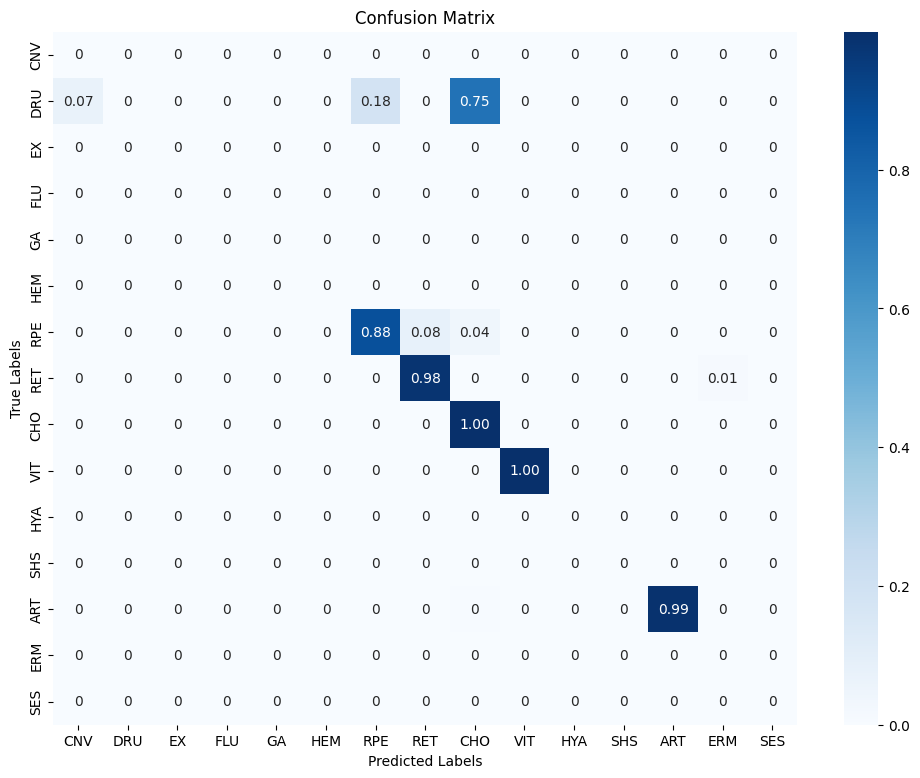

Prediction


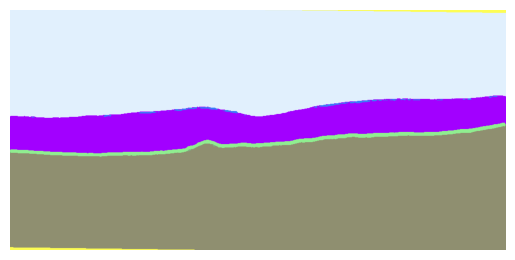

Label


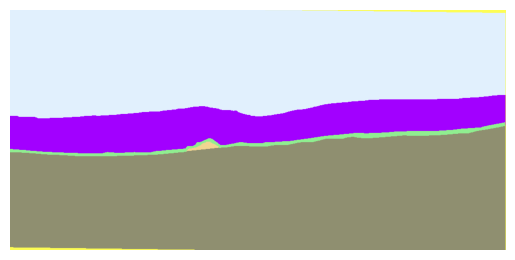

Original


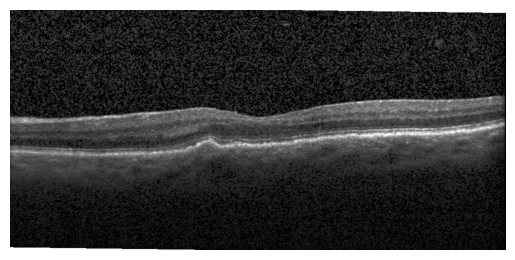

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_1-DRU-109-DRUSEN-53885_0000.tif
(19, 496, 1024)
[ 1  2  5  6  7  8  9 10 13 14 15] [  31658   19605   29261    5638  137718 1331837 4300733 3021292  765345
    6867     222]
(19, 496, 1024)
(19, 496, 1024)


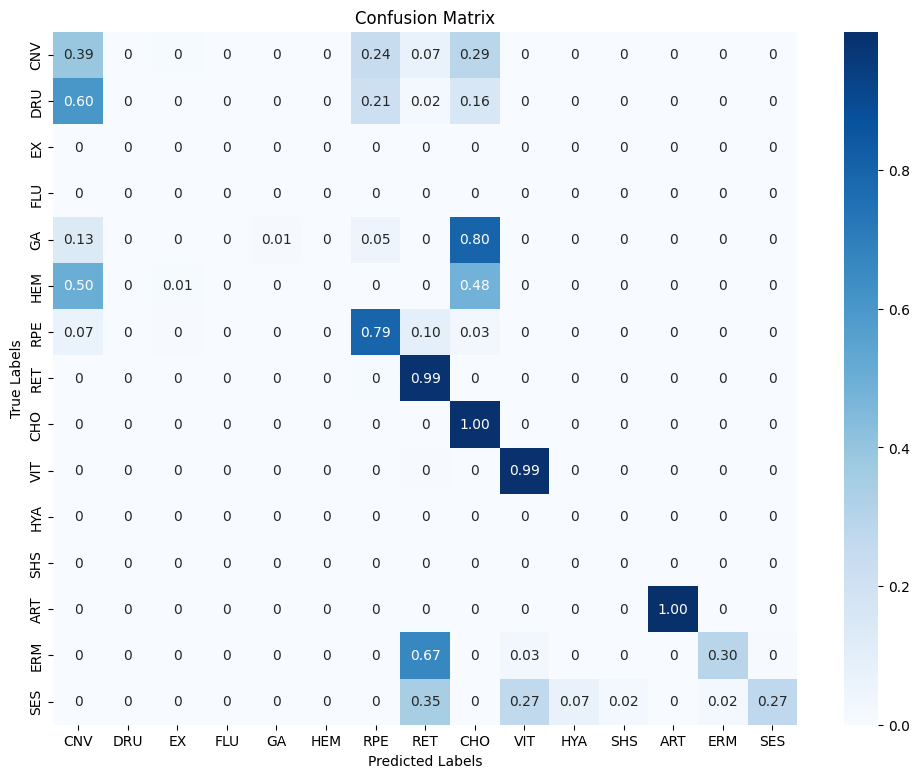

Prediction


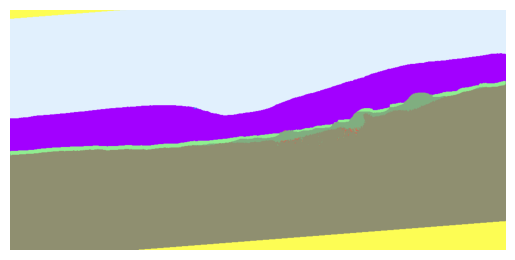

Label


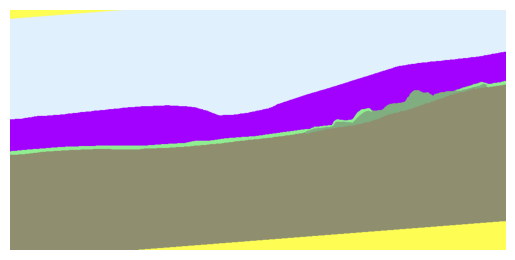

Original


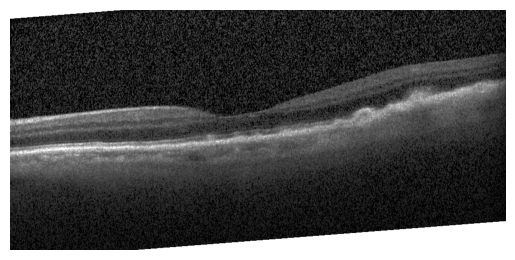

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_1-NORMAL-67-NORMAL-9-73688_0000.tif
(19, 496, 1024)
[ 7  8  9 10 13] [ 144671 1401555 4443788 2973708  686454]
(19, 496, 1024)
(19, 496, 1024)


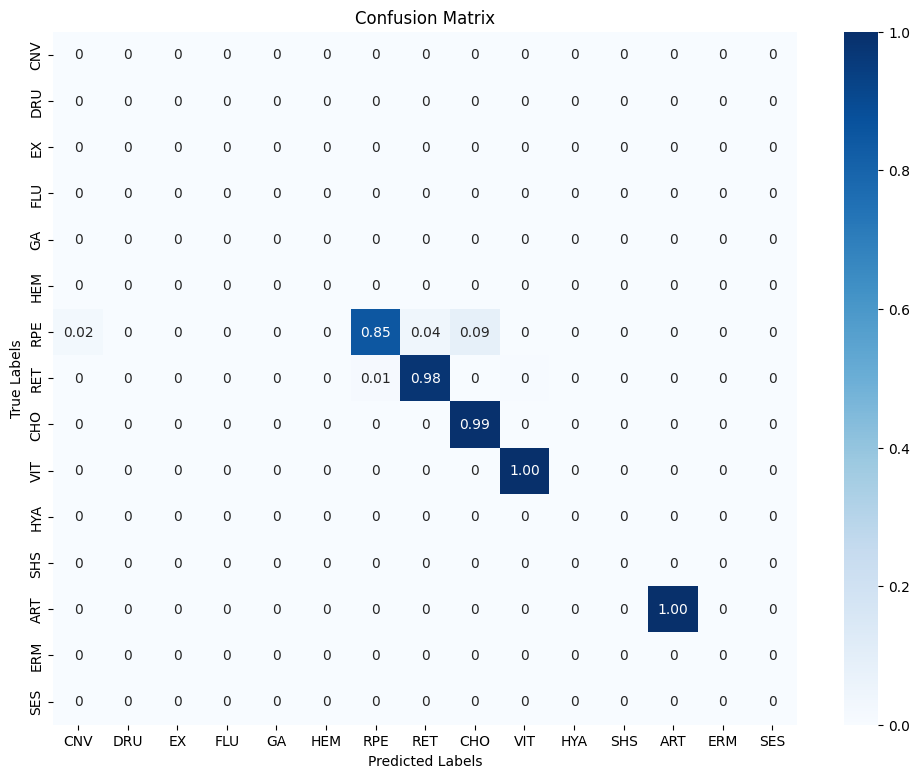

Prediction


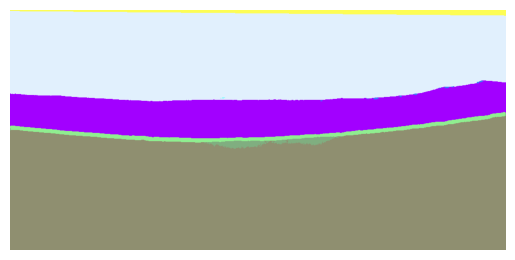

Label


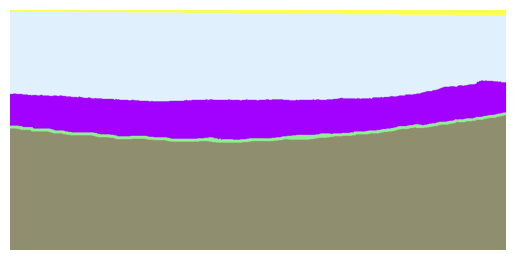

Original


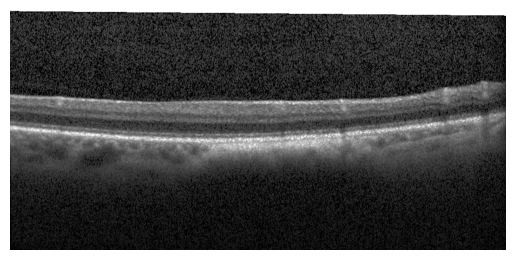

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-CNV-2060887-1XX-X-XXX-0-20-00000-9-3D_0000.tif
(19, 496, 1024)
[ 1  4  6  7  8  9 10 13 14] [  37506   32528   12418  141212 1393088 4235767 3181436  609687    6534]
(19, 496, 1024)
(19, 496, 1024)


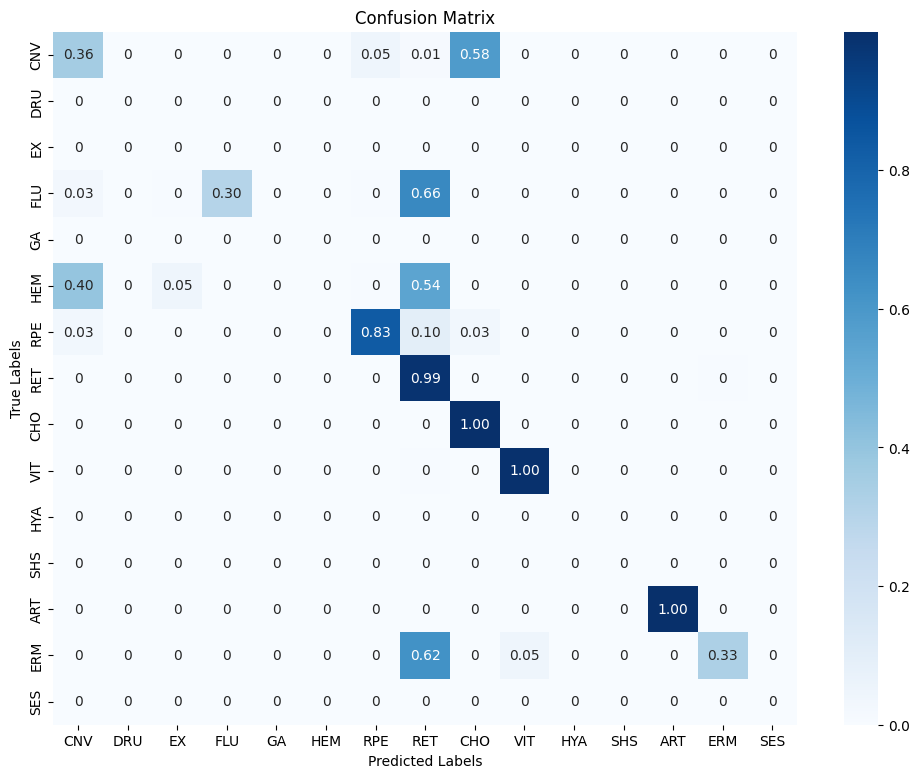

Prediction


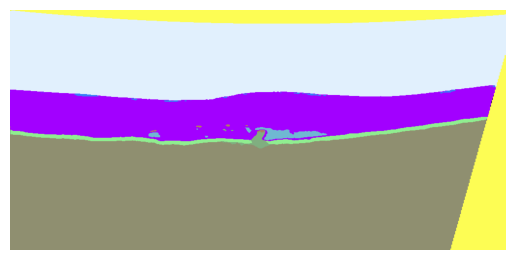

Label


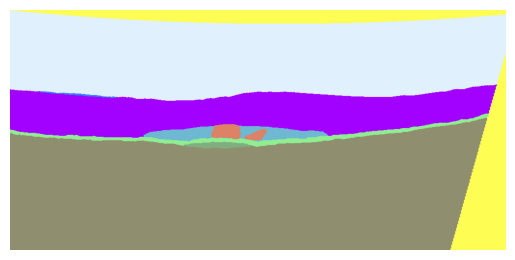

Original


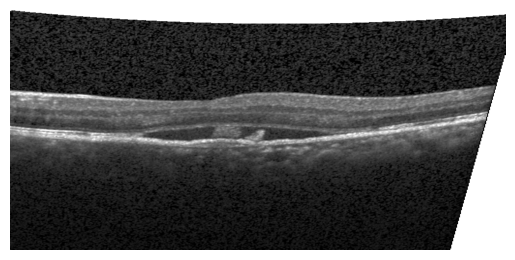

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-DME-0211157-1XX-X-XXX-0-01-00000-9-3D_0000.tif
(19, 496, 1024)
[ 2  3  4  6  7  8  9 10 13 14 15] [    259    3987  132705    4840  124704 1601066 4858725 2624081  268690
   28008    3111]
(19, 496, 1024)
(19, 496, 1024)


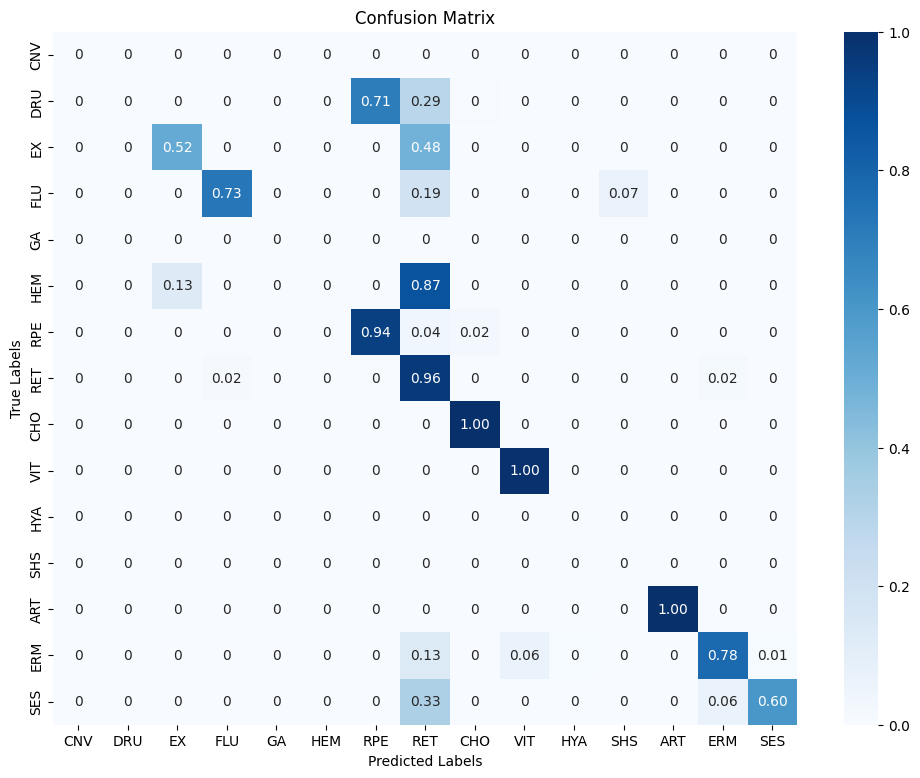

Prediction


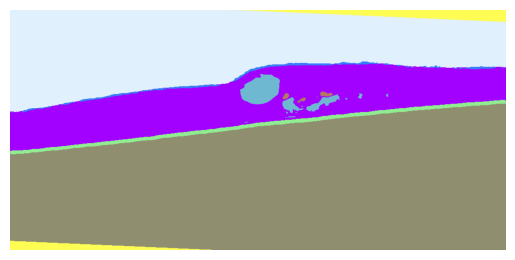

Label


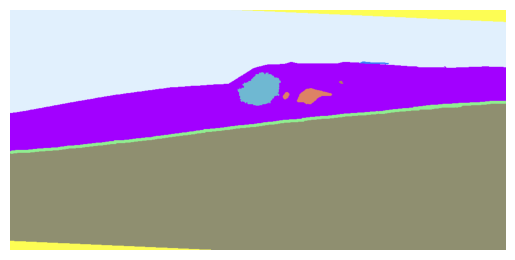

Original


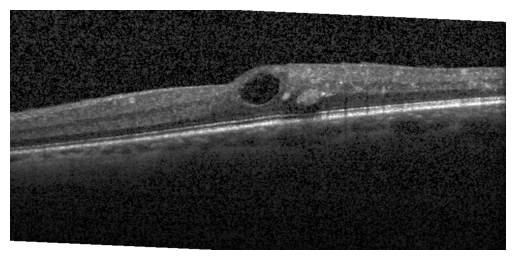

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-DME-0268916-1XX-X-XXX-0-03-00000-9-3D_0000.tif
(19, 496, 1024)
[ 4  7  8  9 10 13 14 15] [ 237518  124340 1243033 2672125 5188668  163924   19823     745]
(19, 496, 1024)
(19, 496, 1024)


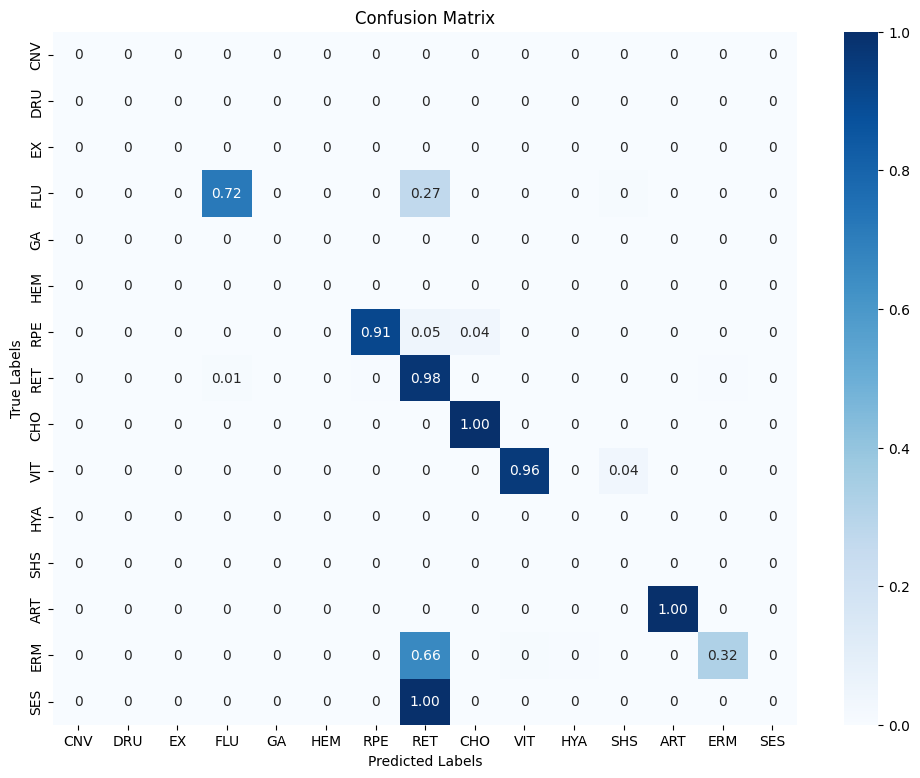

Prediction


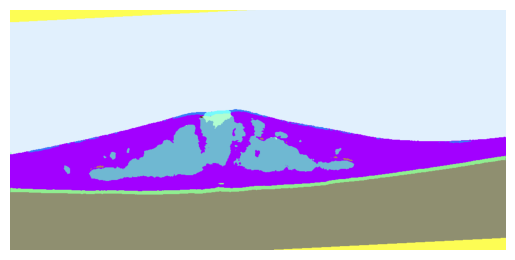

Label


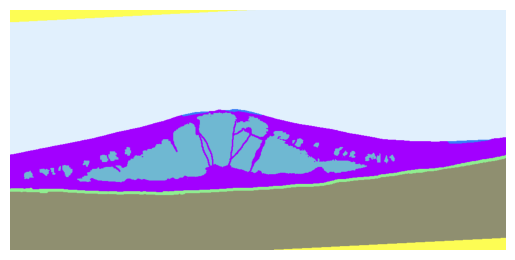

Original


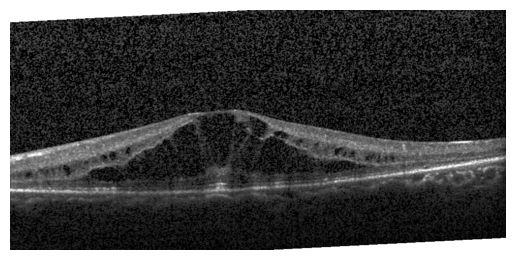

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-DME-0597969-1XX-X-XXX-0-29-00000-9-3D_0000.tif
(19, 496, 1024)
[ 2  4  7  8  9 10 13 14] [   1028  155786  124876 1978113 4746193 2496868  126445   20867]
(19, 496, 1024)
(19, 496, 1024)


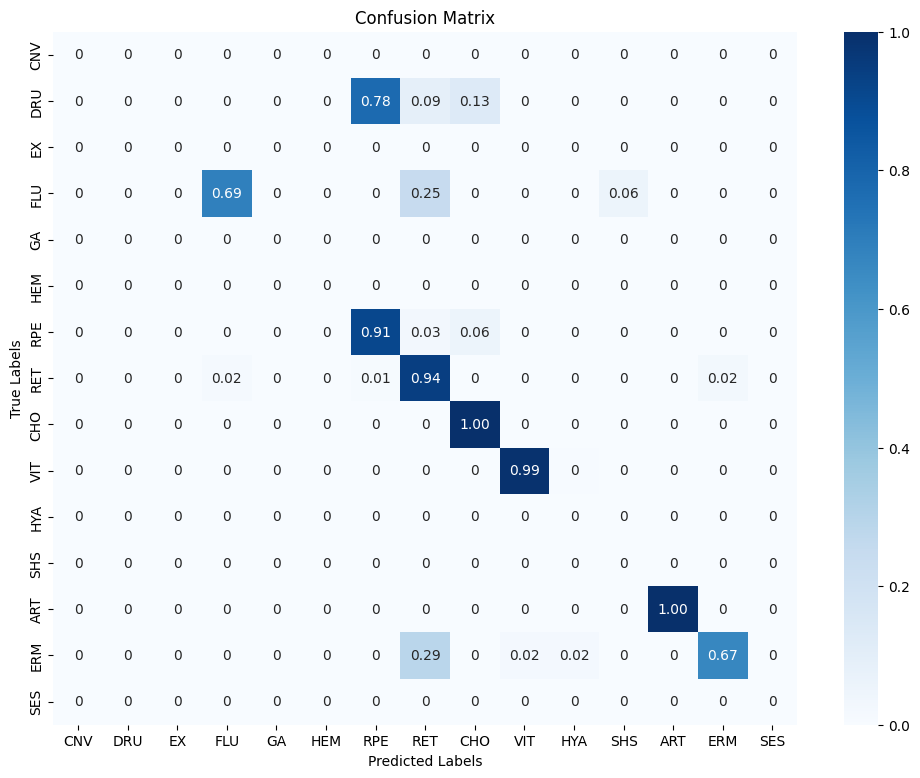

Prediction


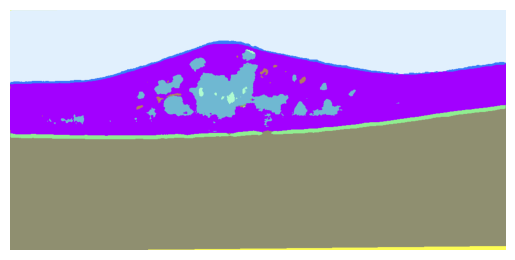

Label


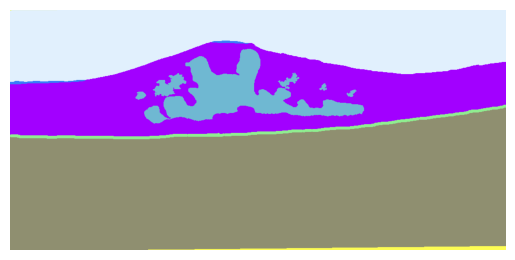

Original


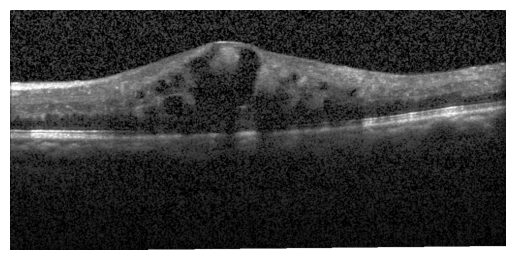

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-DME-1302283-1XX-X-XXX-0-01-00000-9-3D_0000.tif
(19, 496, 1024)
[ 3  4  6  7  8  9 10 13 14] [  55964   10528   10704  118152 1544950 4794379 2670258  382614   62627]
(19, 496, 1024)
(19, 496, 1024)


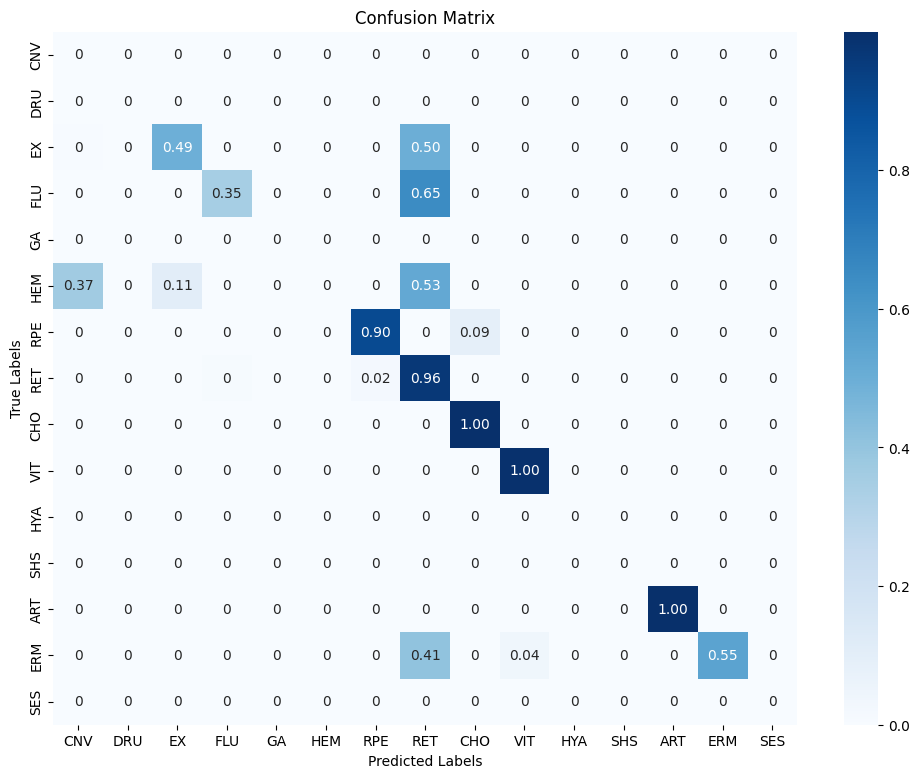

Prediction


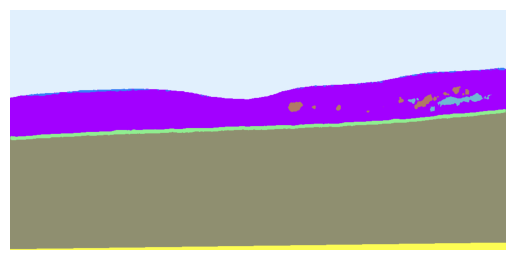

Label


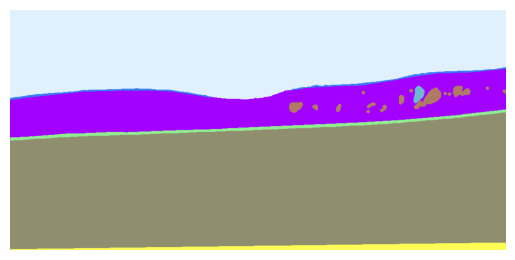

Original


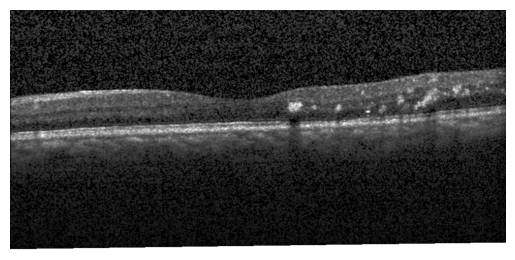

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-DRU-0322668-1XX-X-XXX-0-02-00000-9-3D_0000.tif
(19, 496, 1024)
[ 2  7  8  9 10 11 12 13 14] [   2515  139760 1441524 5049998 2663732   63435   91254  129960   67998]
(19, 496, 1024)
(19, 496, 1024)


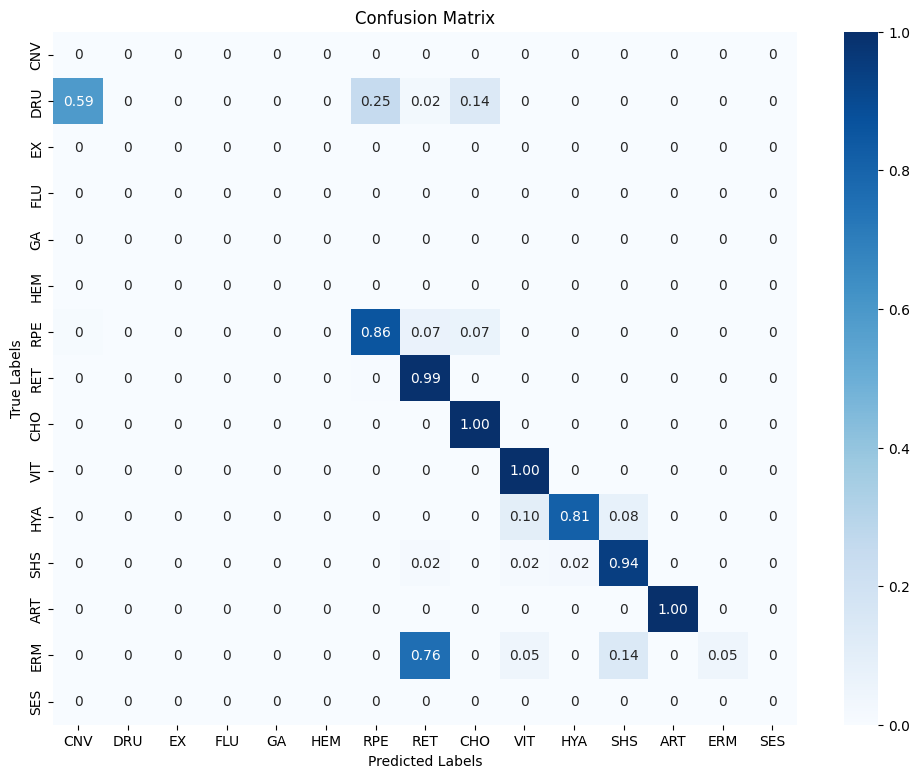

Prediction


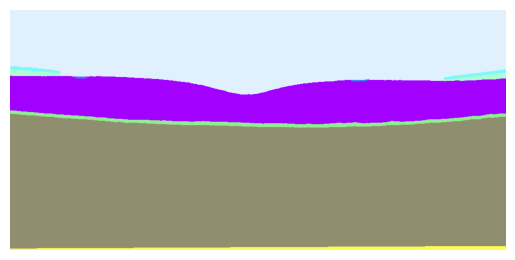

Label


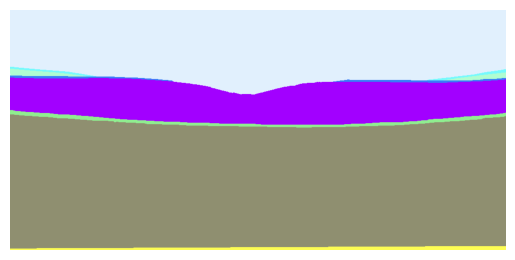

Original


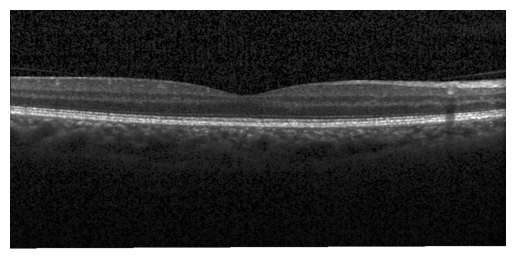

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-DRU-0795823-1XX-X-XXX-0-08-00000-9-3D_0000.tif
(19, 496, 1024)
[ 2  7  8  9 10 13 14] [   3848  124035 1303260 4865963 2686056  651501   15513]
(19, 496, 1024)
(19, 496, 1024)


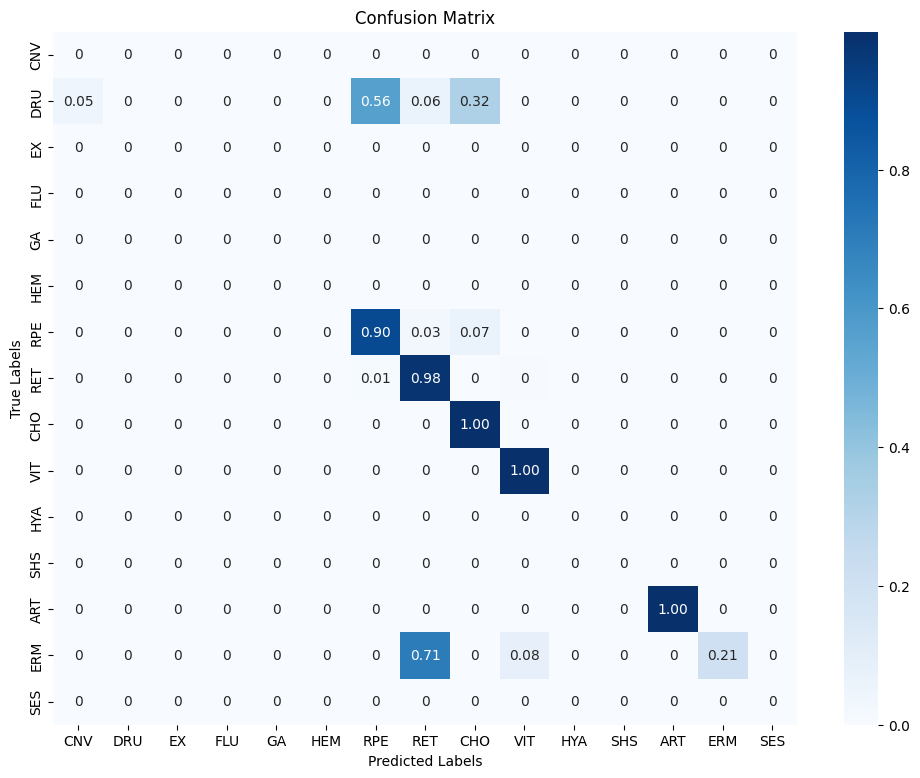

Prediction


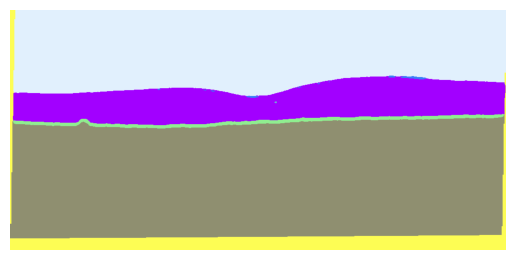

Label


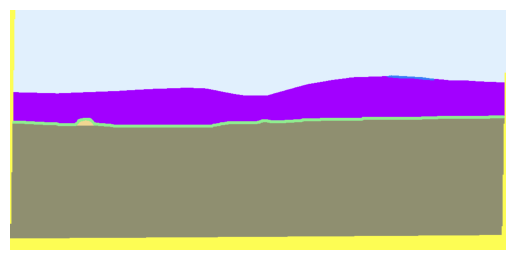

Original


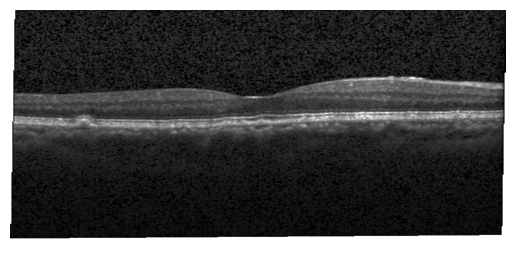

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-ERM-0884761-1XX-X-XXX-0-00-00000-9-3D_0000.tif
(19, 496, 1024)
[ 7  8  9 10 13 14 15] [ 193074 1753522 4617857 2589316  361830  123910   10667]
(19, 496, 1024)
(19, 496, 1024)


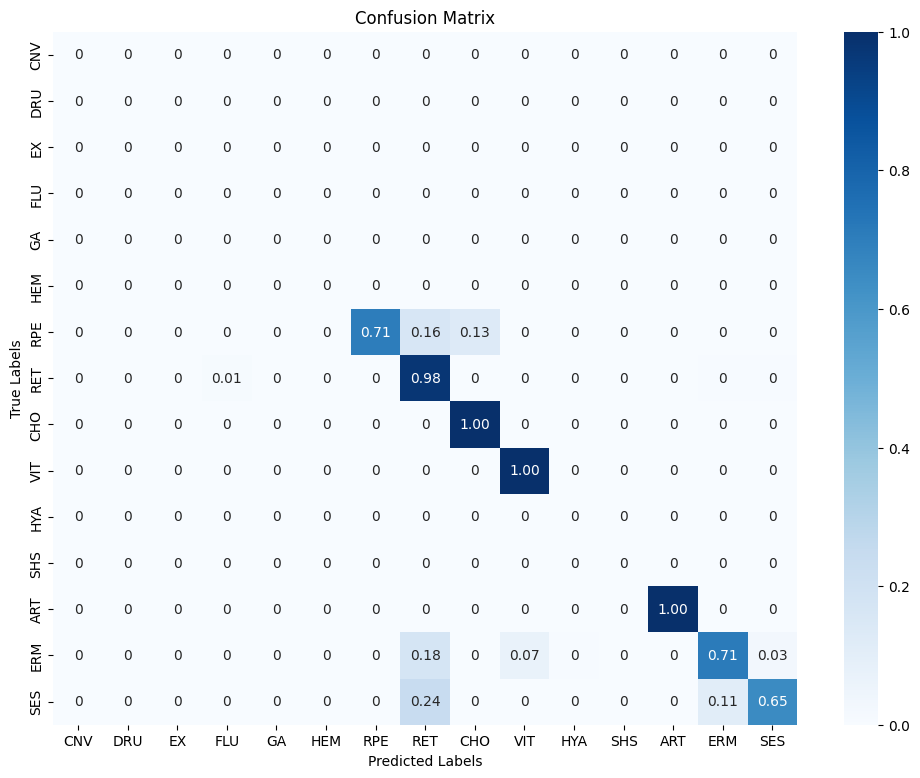

Prediction


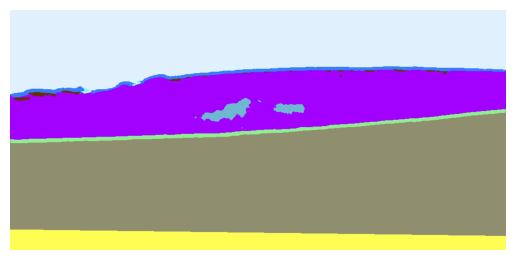

Label


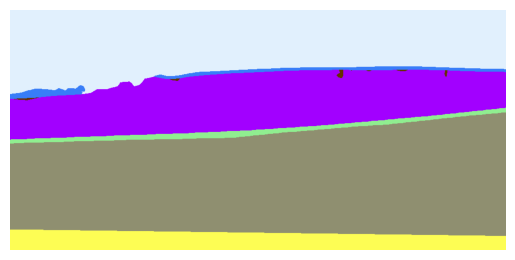

Original


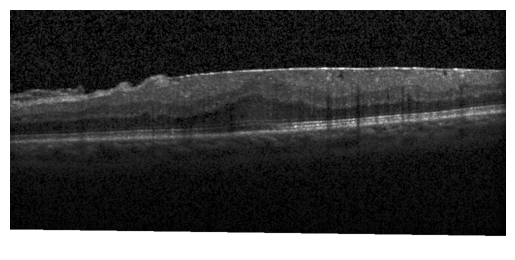

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-ERM-0942217-1XX-X-XXX-0-03-00000-9-3D_0000.tif
(19, 496, 1024)
[ 7  8  9 10 13 14 15] [ 168522 1594012 3749785 3628228  423881   72455   13293]
(19, 496, 1024)
(19, 496, 1024)


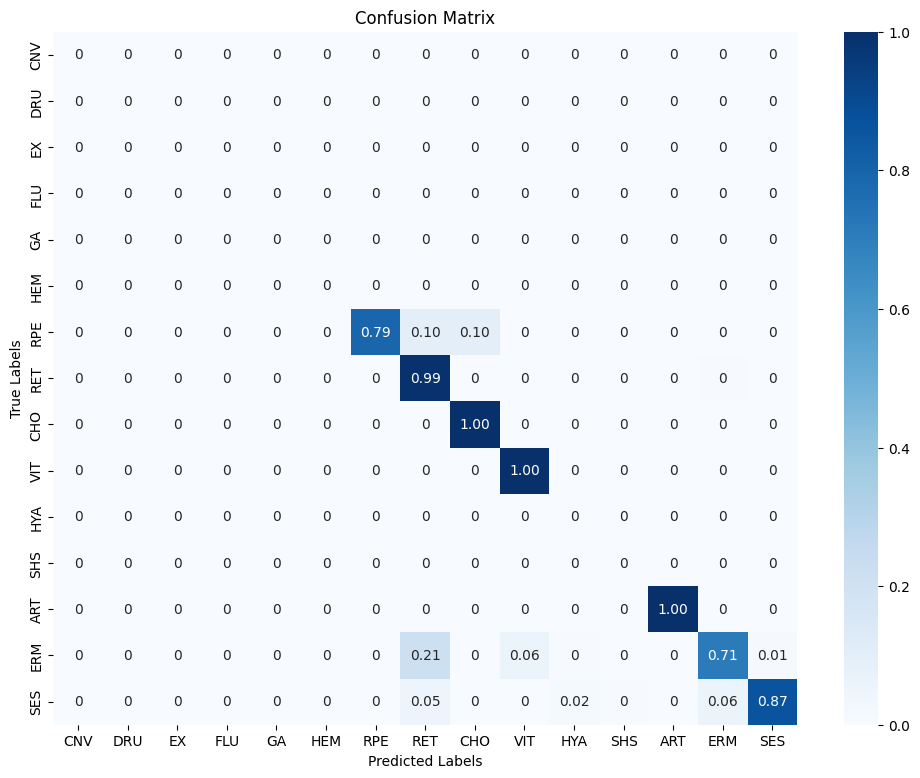

Prediction


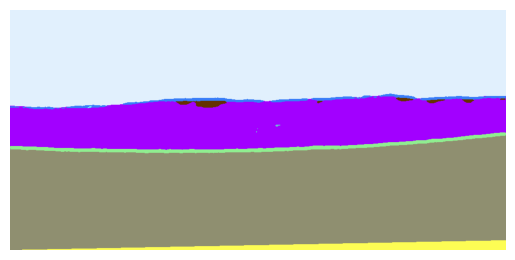

Label


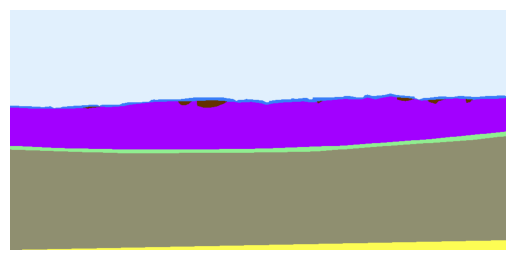

Original


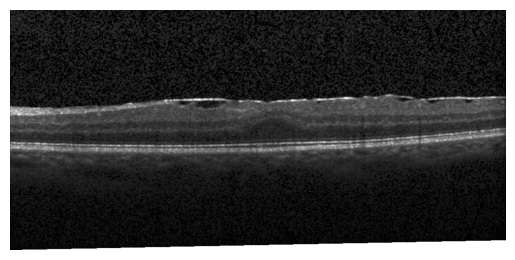

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-ERM-0988847-1XX-X-XXX-0-20-00000-9-3D_0000.tif
(19, 496, 1024)
[ 2  7  8  9 10 13 14 15] [    135  162310 1505883 4306260 2734895  908087   31972     634]
(19, 496, 1024)
(19, 496, 1024)


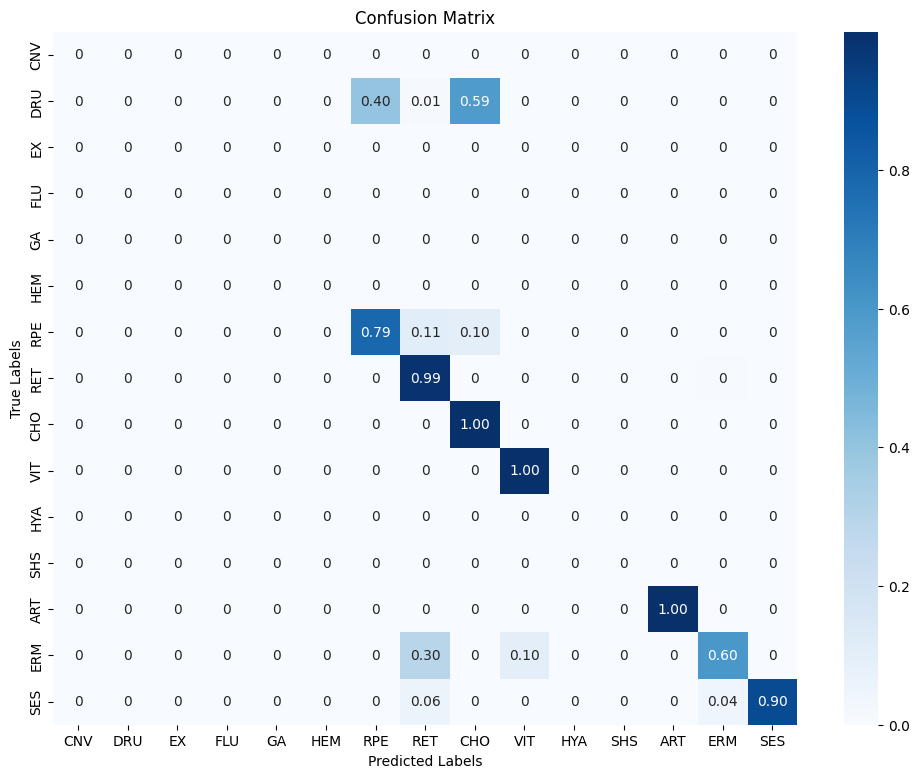

Prediction


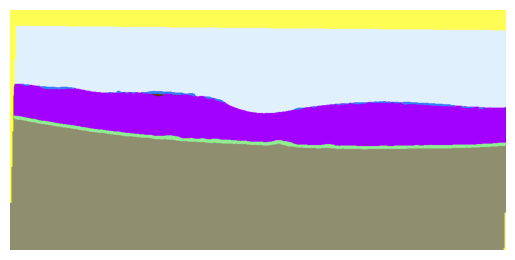

Label


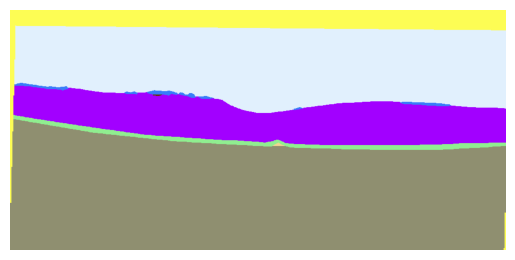

Original


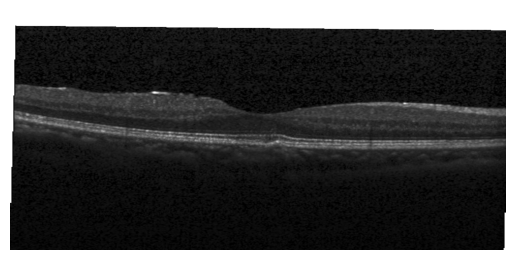

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-ERM-1018301-1XX-X-XXX-0-00-00000-9-3D_0000.tif
(19, 496, 1024)
[ 7  8  9 10 13 14 15] [ 104500 1346463 5038379 2559597  513736   82284    5217]
(19, 496, 1024)
(19, 496, 1024)


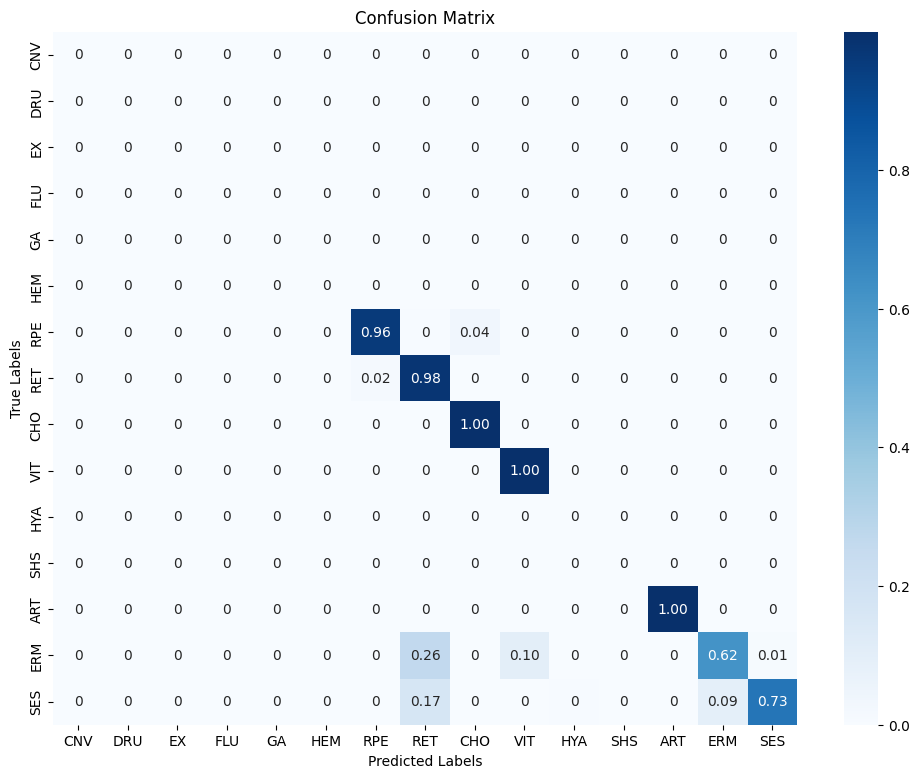

Prediction


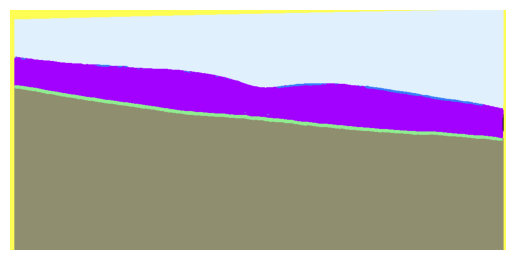

Label


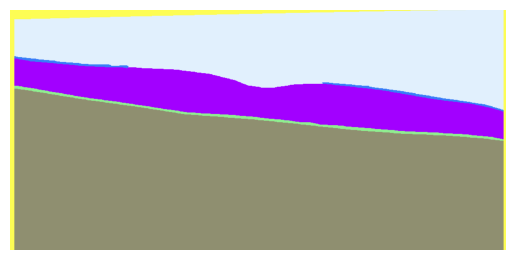

Original


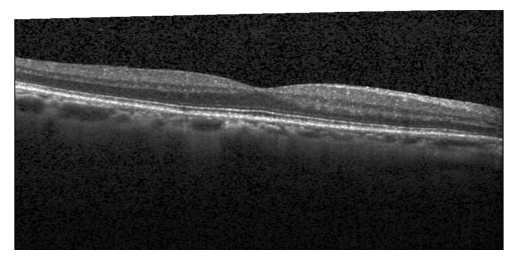

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-NORMAL-0001163-1XX-X-XXX-0-01-00000-9-3D-3D_0000.tif
(19, 496, 1024)
[ 7  8  9 10 13] [ 167525 1393944 4448614 3417509  222584]
(19, 496, 1024)
(19, 496, 1024)


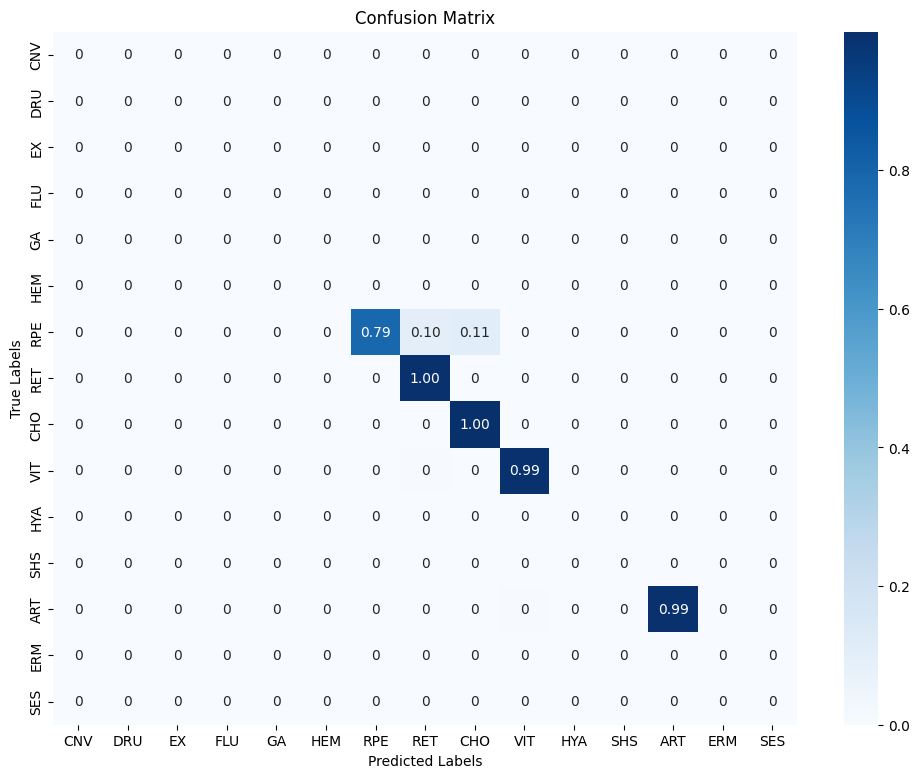

Prediction


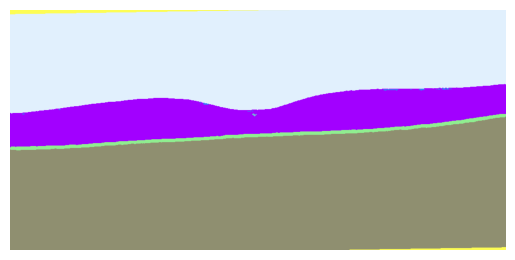

Label


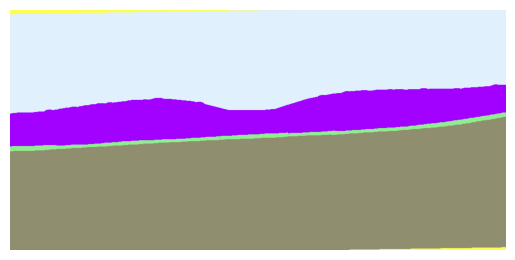

Original


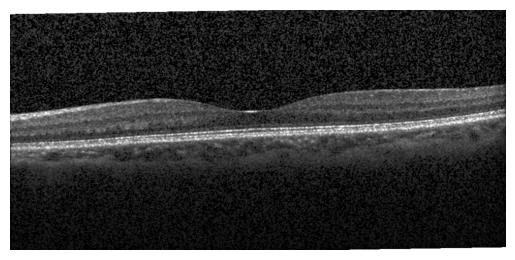

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-NORMAL-0332144-1XX-X-XXX-0-01-00000-9-3D_0000.tif
(19, 496, 1024)
[ 7  8  9 10 11 12 13] [ 119105 1554196 5699409 2038909    7829   18102  212626]
(19, 496, 1024)
(19, 496, 1024)


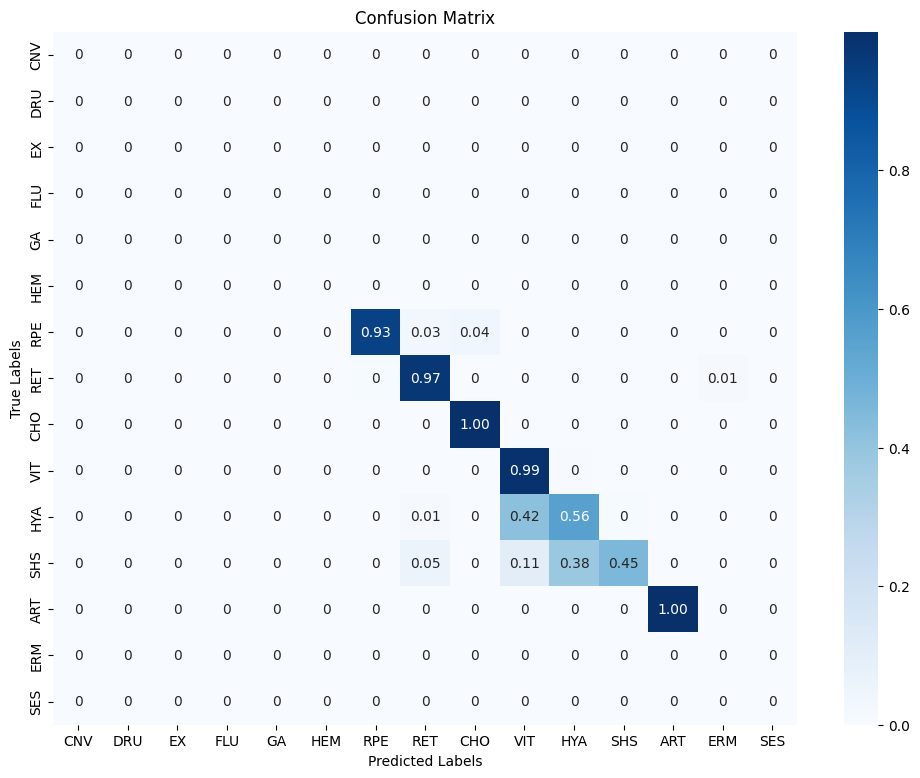

Prediction


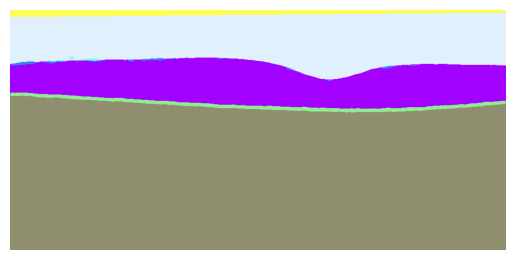

Label


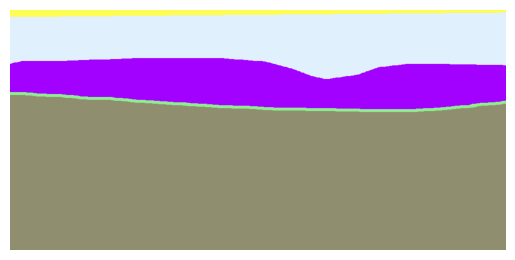

Original


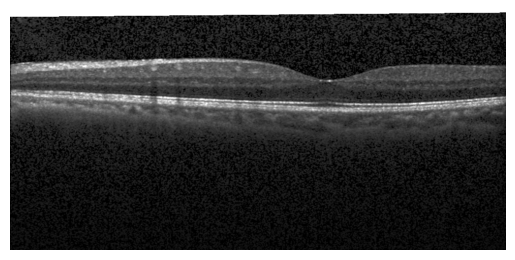

/data/dkermany_data/OCT/nnUNet_raw/Dataset003_OCTAVEv1/imagesTs/RAI02_2-NORMAL-0477156-1XX-X-XXX-0-06-00000-9-3D_0000.tif
(19, 496, 1024)
[ 7  8  9 10 11 12 13] [ 134765 1505576 5832360 2003917    9946     221  163391]
(19, 496, 1024)
(19, 496, 1024)


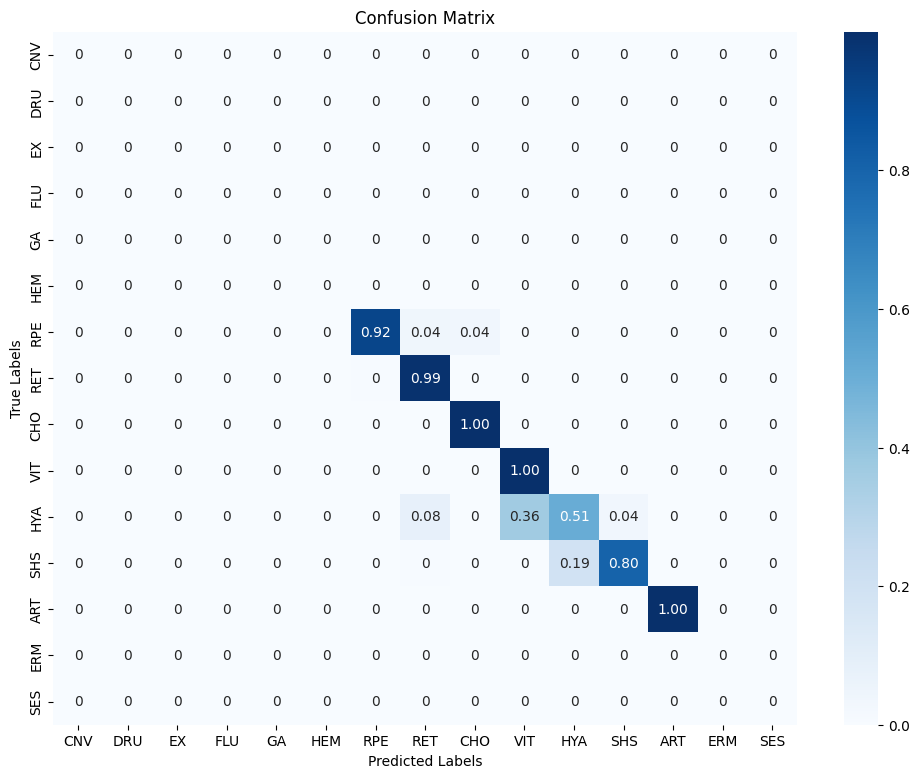

Prediction


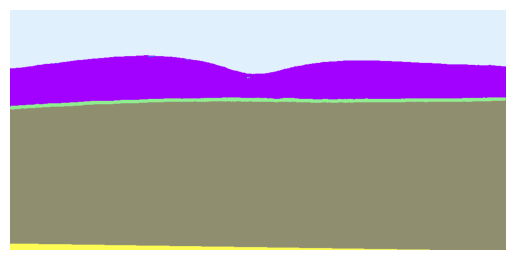

Label


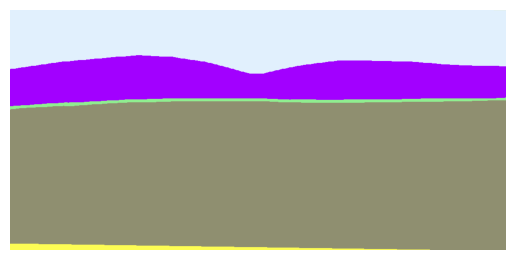

Original


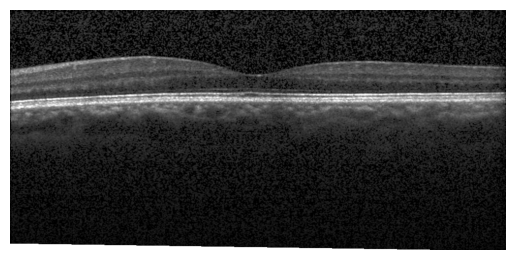

In [5]:
true_labels_all = []
pred_labels_all = []

for f in get_filenames(path, "tif"):
    print(f)
    pred_f = os.path.join(os.path.dirname(f), "predicted", "_".join(os.path.basename(f).split("_")[:-1])+".tif")
    label_f = os.path.join(label_path, "_".join(os.path.basename(f).split("_")[:-1])+".tif")

    pred = tiff.imread(pred_f)
    orig = tiff.imread(f)
    label = tiff.imread(label_f)
    print(label.shape)

    unique_values, counts = np.unique(label, return_counts=True)
    unique_values, counts = np.unique(label, return_counts=True)
    print(unique_values, counts)

    # Flatten the 3D arrays to 1D
    true_labels_flat = label.flatten()
    pred_labels_flat = pred.flatten()
    true_labels_all.append(true_labels_flat)
    pred_labels_all.append(pred_labels_flat)

    print(label.shape)
    print(pred.shape)
    plot_confusion_matrix(true_labels_flat, pred_labels_flat, label_map)
    
    # Create an empty color image with shape (z, y, x, 3) for RGB channels
    z, y, x = orig.shape
    color_pred = np.zeros((z, y, x, 3), dtype=np.uint8)
    color_label = np.zeros((z, y, x, 3), dtype=np.uint8)

    # Map the grayscale image to the color image
    for grayscale_value, hex_color in color_map.items():
        rgb_color = hex_to_rgb(hex_color)
        color_pred[pred == grayscale_value] = rgb_color
        color_label[label == grayscale_value] = rgb_color

    
    print("Prediction")
    plt.axis("off")
    plt.imshow(color_pred[9])
    plt.show()
    print("Label")
    plt.axis("off")
    plt.imshow(color_label[9])
    plt.show()
    print("Original")
    plt.axis("off")
    plt.imshow(orig[9], cmap="gray")
    plt.show()

    # for i in range(19):
    #     output_name = os.path.splitext(f)[0] + f"slice{i}.png"
    #     # plt.axis("off")
    #     # plt.imshow(orig[i], cmap="gray")
    #     # plt.show()
    #     cv2.imwrite(output_name, orig[i])
    # break



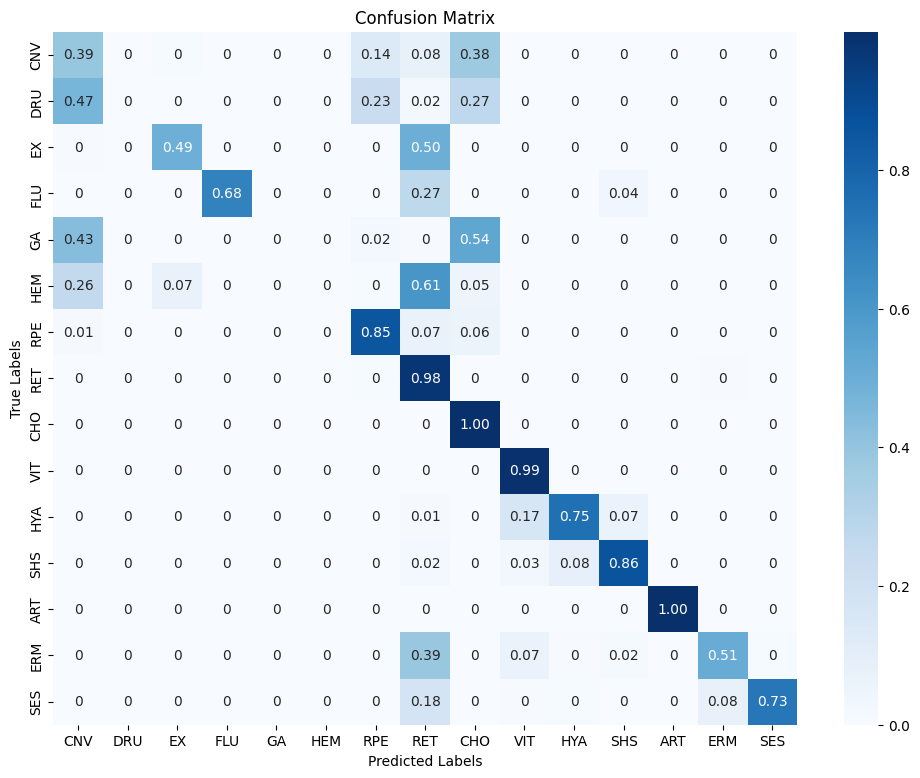

In [6]:
# Concatenate all flattened labels and predictions into 1D arrays
true_labels_all = np.concatenate(true_labels_all)
pred_labels_all = np.concatenate(pred_labels_all)

plot_confusion_matrix(true_labels_all, pred_labels_all, label_map)